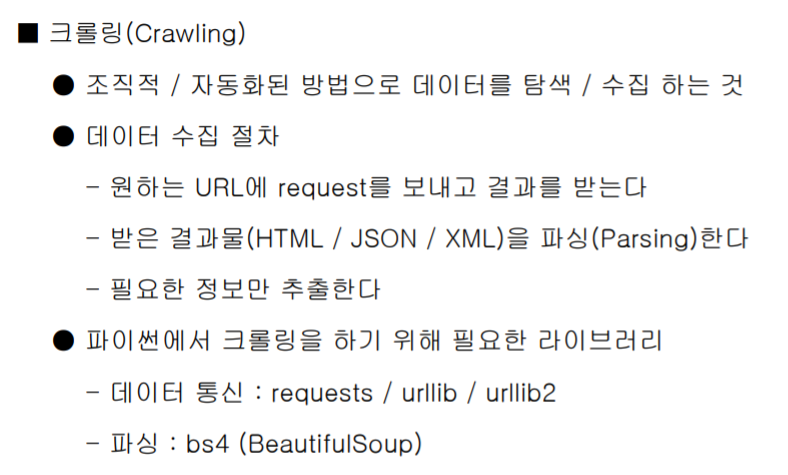

In [6]:
import requests
result=requests.get('http://ggoreb.com/http')
result

<Response [200]>

In [5]:
result.status_code

200

In [8]:
result.encoding = 'utf-8'
result.text

"<html lang='ko'>\n<head>\n    <meta charset='utf-8' >\n</head>\n<body>\n    <h3>\n        <a href='#'>허니비</a>\n    </h3>\n</body>\n</html>"

In [9]:
def get_html(url):
    html = ''
    res = requests.get(url)
    if res.status_code == 200:
        res.encoding = 'utf-8'
        html = res.text
    return html

In [10]:
get_html('http://ggoreb.com/http')

"<html lang='ko'>\n<head>\n    <meta charset='utf-8' >\n</head>\n<body>\n    <h3>\n        <a href='#'>허니비</a>\n    </h3>\n</body>\n</html>"

In [11]:
import requests
res = requests.get('http://ggoreb.com/python/request.jsp')
print(res.status_code)
print(res.text)

200



method : GET<br>
query string<br>
<br><br>
header<br>
key : accept, value : */*<br>
key : Accept-Encoding, value : gzip, deflate<br>
key : connection, value : close<br>
key : host, value : ggoreb.com<br>
key : HOSTING_CONTINENT_CODE, value : AS<br>
key : HOSTING_COUNTRY_CODE, value : KR<br>
key : HOSTING_WHITE_IP, value : false<br>
key : user-agent, value : python-requests/2.22.0<br>
key : X-Forwarded-Proto, value : http<br>
key : X-SERVER_PORT, value : 80<br>
key : X-SERVER_PROTOCOL, value : HTTP/1.1<br>
key : X-SIMPLEXI, value : 222.107.238.125<br>
key : content-length, value : 0<br>



### 파라미터 사용

In [12]:
import requests
param = { 'age': 27, 'name': 'dd', 'gender': 'female' }
res = requests.get('http://ggoreb.com/python/request.jsp', params=param)
print(res.text)




method : GET<br>
query string<br>
key : name, value : dd<br>
key : age, value : 27<br>
key : gender, value : female<br>
<br><br>
header<br>
key : accept, value : */*<br>
key : Accept-Encoding, value : gzip, deflate<br>
key : connection, value : close<br>
key : host, value : ggoreb.com<br>
key : HOSTING_CONTINENT_CODE, value : AS<br>
key : HOSTING_COUNTRY_CODE, value : KR<br>
key : HOSTING_WHITE_IP, value : false<br>
key : user-agent, value : python-requests/2.22.0<br>
key : X-Forwarded-Proto, value : http<br>
key : X-SERVER_PORT, value : 80<br>
key : X-SERVER_PROTOCOL, value : HTTP/1.1<br>
key : X-SIMPLEXI, value : 222.107.238.125<br>
key : content-length, value : 0<br>



In [14]:
import requests
headers = {'accept-language': 'en'} #dict
res = requests.get(
    'http://youtube.com', headers=headers
)
res


<Response [200]>

In [17]:
res.text[:300]

'  <!DOCTYPE html><html lang="en" data-cast-api-enabled="true"><head><style name="www-roboto" >@font-face{font-family:\'Roboto\';font-style:italic;font-weight:500;src:local(\'Roboto Medium Italic\'),local(\'Roboto-MediumItalic\'),url(//fonts.gstatic.com/s/roboto/v18/KFOjCnqEu92Fr1Mu51S7ACc6CsE.ttf)format(\''

In [16]:
import requests
result = get_html('http://ggoreb.com/python/html/data1.html')
result

'<!DOCTYPE html>\n<html>\n<body>\n\n<h2>Basic HTML Table</h2>\n\n<table style="width:100%">\n  <tr>\n    <th>Firstname</th>\n    <th>Lastname</th> \n    <th>Age</th>\n  </tr>\n  <tr>\n    <td>Jill</td>\n    <td>Smith</td>\n    <td>50</td>\n  </tr>\n  <tr>\n    <td>Eve</td>\n    <td>Jackson</td>\n    <td>94</td>\n  </tr>\n  <tr>\n    <td>John</td>\n    <td>Doe</td>\n    <td>80</td>\n  </tr>\n</table>\n\n</body>\n</html>\n'

In [19]:
s_idx = 0
e_idx = 0
while True:
    s_idx = result.find('<td>',s_idx) #s_idx 이후의 td를 찾아라
    if s_idx == -1:
        break
    e_idx = result.find('</td>', s_idx)
    print(result[s_idx+4:e_idx]) #<td>를 생략하고 그 다음부터의 문자열을 출려갛고 싶어서 4글자 +
    s_idx = e_idx #/td 이후의 td를 찾고 싶으니깐

Jill
Smith
50
Eve
Jackson
94
John
Doe
80


### 네이버증권에서 코스피 지수 가져오기

In [28]:
def get_html(url):
    html = ''
    res = requests.get(url)
    if res.status_code == 200:
        res.encoding = 'euc-kr'
        html = res.text
    return html

In [30]:
import requests
result = get_html('https://finance.naver.com')

In [31]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(result, 'html.parser')

#### CSS selector로 찾기

In [40]:
nums = soup.select('.num_quot > .num')
nums

[<span class="num">2,231.65</span>,
 <span class="num">682.01</span>,
 <span class="num">300.14</span>]

In [42]:
for num in nums:
    print(num.getText())
    print(num.text)

2,231.65
2,231.65
682.01
682.01
300.14
300.14


#### find 로 찾기

In [43]:
print(soup.find('div'))
print(soup.find('div').getText())

<div id="u_skip">
<a href="#menu" tabindex="1"><span>메인 메뉴로 바로가기</span></a>
<a href="#start" tabindex="2"><span>본문으로 바로가기</span></a>
</div>

메인 메뉴로 바로가기
본문으로 바로가기



In [47]:
print(soup.find_all('div')[0])


<div id="u_skip">
<a href="#menu" tabindex="1"><span>메인 메뉴로 바로가기</span></a>
<a href="#start" tabindex="2"><span>본문으로 바로가기</span></a>
</div>


### 연습문제, 페이지에서 로또 번호 가져오기

In [49]:
result = get_html('http://ggoreb.com/python/html/number.html')
result

'<div class="lotto_win_number mt12">\n <h3 class="result_title"><strong>800</strong> \n <img src="http://nlotto.co.kr/img/contents/result/wininfo/txt_lotto_num02.gif" alt="제">\n <span>(2018년 03월 31일 추첨)</span></h3>\n\n <p class="number">\n    <img src="http://nlotto.co.kr/img/common_new/ball_1.png" alt="1">\n     <img src="http://nlotto.co.kr/img/common_new/ball_4.png" alt="4">\n     <img src="http://nlotto.co.kr/img/common_new/ball_10.png" alt="10">\n     <img src="http://nlotto.co.kr/img/common_new/ball_12.png" alt="12">\n     <img src="http://nlotto.co.kr/img/common_new/ball_28.png" alt="28">\n     <img src="http://nlotto.co.kr/img/common_new/ball_45.png" alt="45">\n     <span class="plus">+</span>\n     <span class="number_bonus"><img src="http://nlotto.co.kr/img/common_new/ball_26.png" alt="26"></span>\n    \n\n\n\n </p>\n\n</div>'

In [50]:
soup = BeautifulSoup(result,'html.parser')
soup

<div class="lotto_win_number mt12">
<h3 class="result_title"><strong>800</strong>
<img alt="제" src="http://nlotto.co.kr/img/contents/result/wininfo/txt_lotto_num02.gif"/>
<span>(2018년 03월 31일 추첨)</span></h3>
<p class="number">
<img alt="1" src="http://nlotto.co.kr/img/common_new/ball_1.png"/>
<img alt="4" src="http://nlotto.co.kr/img/common_new/ball_4.png"/>
<img alt="10" src="http://nlotto.co.kr/img/common_new/ball_10.png"/>
<img alt="12" src="http://nlotto.co.kr/img/common_new/ball_12.png"/>
<img alt="28" src="http://nlotto.co.kr/img/common_new/ball_28.png"/>
<img alt="45" src="http://nlotto.co.kr/img/common_new/ball_45.png"/>
<span class="plus">+</span>
<span class="number_bonus"><img alt="26" src="http://nlotto.co.kr/img/common_new/ball_26.png"/></span>
</p>
</div>

In [60]:
nums = soup.select('.number > img ')
for num in nums:
    print(num['alt'])

1
4
10
12
28
45


### 연습문제 title 가져오기

In [66]:
def get_html(url):
    html = ''
    res = requests.get(url)
    if res.status_code == 200:
        res.encoding = 'None'
        html = res.text
    return html
result = get_html('http://ggoreb.com/python/html/attribute.html')

soup = BeautifulSoup(result, 'html.parser')
titles = soup.select('img')
for title in titles:
    print(title['title'])

루피
나미
로빈
조로


In [69]:
address = 'http://ggoreb.com/python/html/attribute.html'
res = requests.get(address)
res.encoding = None

result = res.text
soup = BeautifulSoup(result, 'html.parser')
titles = soup.select('img')
for title in titles:
    print(title['title'])

루피
나미
로빈
조로


### 연습문제 유튜브 검색결과 가져오기

In [88]:
address = 'https://www.youtube.com/results?search_query=%EC%9B%90%ED%94%BC%EC%8A%A4'
res = requests.get(address)
res.encoding = 'uft-8'

result = res.text

In [86]:
soup = BeautifulSoup(result, 'html.parser')

In [183]:
# soup

In [ ]:
titles = soup.select('h3.yt-lookup-title')
titles
# for title in titles:
#     print(title)

In [219]:
address = 'https://www.youtube.com/results?search_query=%EC%9B%90%ED%94%BC%EC%8A%A4'
res = requests.get(address)
# res.encoding = 'uft-8'
res

<Response [200]>

In [235]:
soup = BeautifulSoup(res.text, 'html.parser')

In [234]:

div = soup.find_all('h3', {'class': 'yt-lockup-title '})
titles=soup.select('h3 > a.yt-uix-tile-link')
for title in titles:
    print(title.text)

[원피스분석] 해적왕 골드로저가 1년동안 사라졌던 이유?! 죽음을 앞둔 그의 마지막 계획! 그것은 바로...
[원피스 917화 애니] 충격적인 흔들흔들 열매의 힘! 2년후 사황이된 검은수염 마살 D 티치 등장!
2019년 원피스 최근스토리 8분만에 다보기
[원피스 분석]  소름돋는 원피스의 정체!원피스 연재 레전드 967화 분석  (뇌피셜록)
[원피스 정보] 원피스 세계 모든 역사 총정리 2부 대해적 시대 이후
[원피스 915화 명장면] 사황 카이도우 vs 기어 4 루피 ㄷ ㄷ
[원피스 정보] 악마의 열매 중 줘도 갖기 싫은 쓰레기 열매 TOP 5
[원피스] 의식이 없는 와중에도 패왕색 패기 내뿜는 루피
[원피스 917화 명장면] 검은 수염의 현상금이 드디어 공개되다 ㄷ ㄷ
[기승전모] '원피스'의 과거와 현재에 대해 알아보자.
원피스 료쿠규와 함께 괴물로 평가 받는 후지토라의 강함에 대해
[원피스 917화 명장면] 겟코 모리아의 뉴스를 본 미호크&페로나의 반응 ㅋㅋㅋ
원피스 이제는 검은 수염과 손을 잡은 아오키지.. 그의 강함은?
(원피스 명장면) 루피VS카타쿠리(원피스 루피 전투신!!!)
[원피스]와노쿠니 이후 루피의 새로운 동료는 전설 속에 사는 남자 버기? 칠무해의 해산과 캡틴 존의 보물에 감춰진 오다의 숨겨진 떡밥!
[원피스 916화 애니] 무의식의 극의 루피 패왕색 패기 발동!! (애니리뷰 TMI)
【원피스】최근화에 밝혀진 놀라운떡밥! 샹크스는 천룡인!?
[원피스 정보] 현상금 순위 TOP10 공개되지 않은 거물급들의 현상금은?
원피스 조로 와노쿠니 전투씬 모음
[원피스 967화 리뷰] 점점 드러나는 원피스의 정체와 라프텔의 의미!!


### 네이버 영화 순위 크롤링

In [90]:

    
address = 'https://movie.naver.com/movie/sdb/rank/rmovie.nhn'
res = requests.get(address)
# res.encoding = 'uft-8'

result = res.text
soup = BeautifulSoup(result, 'html.parser')
a_list=soup.select('.tit3 > a')
for a in a_list:
    print(a.getText())

닥터 두리틀
백두산
스타워즈: 라이즈 오브 스카이워커
천문: 하늘에 묻는다
미드웨이
해치지않아
시동
나쁜 녀석들 : 포에버
남산의 부장들
겨울왕국 2
포드 V 페라리
나이브스 아웃
히트맨
지푸라기라도 잡고 싶은 짐승들
터미네이터: 다크 페이트
기생충
미스터 주: 사라진 VIP
카운트다운
극장판 원피스 스탬피드
비스티걸스
트레져 헌터: 비밀의 책
나이트 헌터
갱
21 브릿지: 테러 셧다운
피아니스트의 전설
청춘빌라 살인사건
신비아파트 극장판 하늘도깨비 대 요르문간드
울지마 톤즈 2 : 슈크란 바바
타오르는 여인의 초상
콰이어트 플레이스 2
라스트 선라이즈
여곡성
1917
콰이어트 플레이스
눈의 여왕4
프릭스
인셉션
스케치
마녀
6 언더그라운드
벌룬
타발루가와 얼음공주
로그 원: 스타워즈 스토리
엄마 바람피게하기
게이트키퍼 : 또 다른 세계
스파이즈
아이리시맨
스타워즈: 라스트 제다이
신의 은총으로
차일드 인 타임


### 위메프 가전, 디지털 추천상품 정보 가져오기

In [98]:
import requests
from bs4 import BeautifulSoup as bs
address = 'http://www.wemakeprice.com/main/100030'
res = requests.get(address)
res.encoding = None
res=res.text

In [102]:
soup = BeautifulSoup(res, 'html.parser')
titles=soup.select('.tit_desc')
for title in titles:
    print("="*40)
    print("제목", title.text)

제목 [쿠폰+카드 중복할인] 바디픽셀 정품 머슬건 무선 진동 마사지건 (기본구성)
제목 유스마일 EMS 저주파 안마기 NO.1536
제목 [최대혜택가 382,040원] 삼성 갤럭시 A50 자급제폰 공기계 새상품 일반
제목 [최종혜택가 399,000원] 삼성 노트북5 NT550EBZ-AD2A
제목 2020년형 // 아이프리 세탁소용 충전식 보풀제거기 추천 FX-714  칼날2개 구성
제목 엘지전자 모니터 베스트모음전
제목 [1월21일설치][LG전자] 27GL650F 27인치 144Hz 울트라기어 게이밍모니터 
제목 [디지털위크] 닌텐도 스위치 네온 HAD / 그레이 HAD 본체 + 다수 타이틀 택1 / 포켓몬스터 소드/실드/마리오카트8/마리오파티
제목 [최대혜택가 382,040원] 삼성전자 갤럭시A50 64GB 블랙 자급제폰 공기계 새상품 SM-A505N
제목 샌디스크 USB 메모리카드 듀얼 OTG 5핀 C타입 대용량 16G 32G 64G 128G 256G
제목 [디지털위크] [쿠폰 + 카드중복할인] 한일 EMF 무자계 항균 전기요 전기장판 무전자 전기매트
제목 윈도우+오피스365 즉시배송
제목 윈도우+오피스 특가할인 바로배송
제목 [디지털위크] 최신 PC부품 모음전(라이젠 2700X 한정수량 초특가)
제목 벡셀 알카라인 건전지 AA/AAA 20알
제목 MS윈도우 10 설치 USB + 홈/프로 정품키
제목 [디지털위크] [쿠폰+카드중복할인] ASUS 초경량 비보북 X560UD / A407MA 노트북 특가모음전!
제목 [노바리빙] LED모던 미니 체중계
제목 [디지털위크] [쿠폰+카드 중복할인] JMW 항공모터 드라이기&고데기 특가전
제목 (1+1) 무료배송/고속충전기/고속케이블/급속충전기/5핀/8핀/C타입/삼성/LG/아이폰 호환 정품 충전기
제목 [디지털위크] 공식인증점 위닉스 공기청정기 15평형 제로3.0 AZGE500-JWK*
제목 [디지털위크] [공식인증점] 위닉스 종합선물세트! 공기청정기 제로S, 건조기, 제습기 어셈블!
제목 최종가확인!★ 브라운체온계 

### 쿠팡 가전디지털 > 노트북/PC/태블릿 > 노트북 상품 정보 가져오기


In [178]:
# import requests
# from bs4 import BeautifulSoup as bs
# address = 'https://www.coupang.com/np/categories/414501'
# res = requests.get(address)
# res.encoding = None
# res

In [ ]:
dd.descriptions div.name

### 선택자
- select_one :1개
- select :여러개
    
- find :1개
- find_all: 여러개

In [129]:
res = requests.get('http://ggoreb.com/python/html/example.html')
soup = BeautifulSoup(res.text, 'html.parser')
div = soup.find('div', {'class': 'ex_class'})
print(div)
print(soup.find('div').getText())

<div class="ex_class">
<p>d</p>
<p>e</p>
<p>f</p>
</div>

a
b
c



In [130]:
import requests
from bs4 import BeautifulSoup
res = requests.get('http://ggoreb.com/python/html/example.html')
soup = BeautifulSoup(res.text, 'html.parser')
print(soup.find_all('div'))

[<div>
<p>a</p>
<p>b</p>
<p>c</p>
</div>, <div class="ex_class">
<p>d</p>
<p>e</p>
<p>f</p>
</div>, <div id="ex_id">
<p>g</p>
<p>h</p>
<p>i</p>
</div>]


In [138]:
import requests
from bs4 import BeautifulSoup
res = requests.get('https://comic.naver.com/webtoon/list.nhn?titleId=570503&weekday=thu')
soup = BeautifulSoup(res.text, 'html.parser')
titles = soup.select('td.title > a')
# for title in titles:
#     print(title.getText())
    
nums = soup.select('td.num')
# for num in nums:
#     print(num.getText())
    
for num, title in zip(titles, nums):
    print(num.text, title.text)

293. RE: 죄와 벌 (6) <egoist> 2020.01.15
292. RE: 죄와 벌 (5) 2020.01.08
291. RE: 죄와 벌 (4) 2020.01.01
290. RE: 죄와 벌 (3) 2019.12.25
289. RE: 죄와 벌 (2) 2019.12.18
288. RE: 죄와 벌 (1) 2019.12.11
287. 낯선 감정 2019.12.04
286. Weak 2019.11.27
285. OVER 2019.11.20
284. 지쳐갈 때 2019.11.13


## Json 파싱

In [142]:
res = requests.get('http://ggoreb.com/python/json/data1.jsp')
result = res.json()
result

{'age': 10, 'name': 'GGoReb'}

In [147]:
res = requests.get('http://ggoreb.com/python/json/data2.jsp')
result = res.json()
result

[{'age': 10, 'name': 'A'}, {'age': 11, 'name': 'B'}, {'age': 12, 'name': 'C'}]

In [146]:
for i in result:
    print(i['name'], i['age'])

A 10
B 11
C 12


In [150]:
res = requests.get('http://ggoreb.com/python/json/data3.jsp')
result = res.json()
result

[{'address': ['서울', '신림'], 'age': 10, 'name': 'A'},
 {'address': ['대전', '탄방'], 'age': 11, 'name': 'B'},
 {'address': ['부산', '해운대'], 'age': 12, 'name': 'C'}]

In [154]:
for obj in result:
    if isinstance(obj['address'],list):
        for o in obj['address']:
            print(o, end=' ')

서울 신림 대전 탄방 부산 해운대 

### 카카오 지도 API

In [173]:
import requests
from bs4 import BeautifulSoup as bs
address = 'https://dapi.kakao.com/v2/local/search/address.xml'
params = {'query': '서울특별시 동작구 신대방동 395'}
headers = {'Authorization' : 'KakaoAK d4be7b479f4b4cbd99bd19ae87f88b4b'}
res = requests.get(address, params=params, headers=headers)
res.encoding = None

In [176]:
soup = bs(res.text, 'html.parser')
address_list = soup.find_all('address')
for addr in address_list:
    x = addr.find('x').text
    y = addr.find('y').text
    name = addr.find('address_name').text
    print(x,y,name)

126.92261248037842 37.49371334710509 서울 동작구 신대방동 395


In [177]:
import requests

address = 'https://dapi.kakao.com/v2/local/search/address.json'
params = {'query': '서울특별시 동작구 신대방동 395'}
headers = {'Authorization' : 'KakaoAK d4be7b479f4b4cbd99bd19ae87f88b4b'}
res = requests.get(address, params=params, headers=headers)
res.encoding = None
address = res.json()['documents'][0]
name, x, y = address['address_name'], address['x'], address['y']
print(name, x, y)

서울 동작구 신대방동 395 126.92261248037842 37.49371334710509


### PaPago 번역기 API

In [180]:
import requests
from bs4 import BeautifulSoup as bs

address = ' https://kapi.kakao.com/v1/translation/translate'
params = {'query': '배고프다',
          'src_lang' : 'kr',
         'target_lang' : 'vi'
         }
headers = {'Authorization' : 'KakaoAK d4be7b479f4b4cbd99bd19ae87f88b4b'}
res = requests.get(address, params=params, headers=headers)
res.encoding = None
res

<Response [200]>

In [182]:
text = res.json()['translated_text']
text

[['đói']]

## Selenium으로 크롤링하기

In [188]:
from selenium import webdriver as wd
driver = wd.Chrome(executable_path='c:/Code/chromedriver.exe')


In [189]:
driver.get('http://ggoreb.com/http/wait.jsp')

In [196]:
#elements 찾기
# print(driver.find_elements_by_tag_name('p'))
driver.find_element_by_css_selector('p:nth-child(2)').text

'내용'

In [198]:
driver.close()

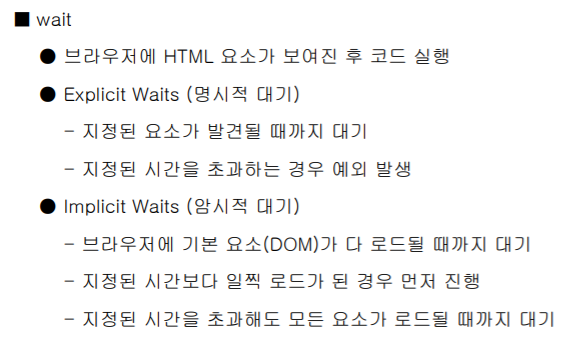

### wait - Explit(명시적)



In [238]:
from selenium import webdriver as wd
driver = wd.Chrome(executable_path='C:/Code/chromedriver.exe')

from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

driver.get('http://ggoreb.com/http/wait.jsp')

try :
    element = WebDriverWait(driver, 10).until(
    EC.presence_of_element_located((By.CSS_SELECTOR, 'p:nth-of-type(2)'))
 )
    print(driver.find_elements_by_tag_name('p')[1].text)
except Exception as e:
    print('오류 발생', e)


5초 뒤 추가 내용


### wait - Implicit(암시적)

In [241]:
'''
from selenium import webdriver as wd
driver = wd.Chrome(executable_path='C:/Code/chromedriver.exe')
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
driver.get('http://ggoreb.com/http/wait.jsp')
driver.implicitly_wait(10)
print(driver.find_elements_by_tag_name('p')[1].text)
'''

#ggoreb은 안됨(로드 다 하고 javascript로 동작하기 때문)

"\nfrom selenium import webdriver as wd\ndriver = wd.Chrome(executable_path='chromedriver.exe')\nfrom selenium.webdriver.common.by import By\nfrom selenium.webdriver.support.ui import WebDriverWait\nfrom selenium.webdriver.support import expected_conditions as EC\ndriver.get('http://ggoreb.com/http/wait.jsp')\ndriver.implicitly_wait(10)\nprint(driver.find_elements_by_tag_name('p')[1].text)\n"

### 요소제어
- send_keys()
- click()

In [244]:
from selenium import webdriver as wd
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC


driver = wd.Chrome(executable_path='C:/Code/chromedriver.exe')
driver.get('http://ggoreb.com/http/control.jsp')

In [268]:
driver.find_element_by_tag_name('input').send_keys('파이썬')
driver.find_element_by_tag_name('button').click()


In [269]:
# alert 창의 '확인'을 클릭합니다.
alert = driver.switch_to.alert
alert.accept()

### 자바스크립트 실행하기(요소제어)
- execute_script

In [270]:
driver.execute_script('alert("hello")')

In [271]:
# alert 창의 '확인'을 클릭합니다.
alert = driver.switch_to.alert
alert.accept()

In [ ]:
driver.close()

## phantomjs : headless하게 웹브라우저 열어서 크롤링

### 연습문제:  네이버 증권 서비스에서 '멀티캠퍼스' 검색 후 투자정보 조회

In [313]:

from selenium import webdriver as wd
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC


# driver = wd.Chrome(executable_path='C:/Code/chromedriver.exe')
driver = wd.PhantomJS(executable_path='phantomjs.exe')
driver.get('https://finance.naver.com')

driver.find_element_by_id('stock_items').send_keys('멀티캠퍼스')
driver.find_element_by_css_selector('.snb_search_btn').click()

driver.implicitly_wait(10)

trs=driver.find_elements_by_css_selector('#tab_con1 > div.first > table > tbody > tr > td')
for i in trs:
    print(i.text)
driver.close()

C:\ProgramData\Anaconda3\lib\site-packages\selenium\webdriver\phantomjs\webdriver.py:49: UserWarning: Selenium support for PhantomJS has been deprecated, please use headless versions of Chrome or Firefox instead
  warnings.warn('Selenium support for PhantomJS has been deprecated, please use headless '


2,033 억원
코스닥 288위
5,926,779
500원 l 1주


### 선택박스에서 값 send하기

In [321]:
from selenium import webdriver as wd
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC


driver = wd.Chrome(executable_path='C:/Code/chromedriver.exe')
# driver = wd.PhantomJS(executable_path='phantomjs.exe')
driver.get('http://ggoreb.com/http/control2.jsp')

driver.find_element_by_name('no').send_keys('부산')
# driver.find_element_by_css_selector('.snb_search_btn').click()

driver.close()

In [319]:
driver.close()

In [ ]:
### 연습문제:  인터파크에서 달랏 패키지 상품 

In [20]:
from selenium import webdriver as wd
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC


driver = wd.Chrome(executable_path='C:/Code/chromedriver.exe')
# driver = wd.PhantomJS(executable_path='phantomjs.exe')
driver.get('http://tour.interpark.com/')

#검색어 입력 후 이동
driver.find_element_by_css_selector('.search-wrap').send_keys('달랏')
driver.find_element_by_css_selector('.search-btn').click()
driver.implicitly_wait(5)

#해외여행 간략 페이지
driver.find_element_by_css_selector('.moreBtn').click()

import time
#해외여행 상세 목록 페이지
time.sleep(2)

In [40]:
import math
totalcnt = 51
totalpage = math.ceil(totalcnt/10)
totalpage

6

In [27]:
#해외여행 패키지 개수 확인
totalAllCnt = driver.find_element_by_css_selector('#totalAllCnt')
totalAllCnt = int(totalAllCnt.text)

#전체 페이지수 확인
totalPage = totalAllCnt//10+1
if totalAllCnt%10 == 0:
    totalPage -=1

for page in range(1, totalPage+1):
    driver.execute_script('searchModule.SetCategoryList({}, '')'.format(page))
#1페이지로 이동
    time.sleep(2)
    boxitems = driver.find_elements_by_css_selector('.oTravelBox .boxItem')
    for item in boxitems:
        print(item.find_element_by_class_name('proTit').text)
        print(item.find_element_by_class_name('img').get_attribute('src'))

[달랏4일] 낭만도시 달랏 직항+랑비앙 포함 3박4일
http://tourimage.interpark.com/product/tour/00161/A10/280/A1031420_1_027.jpg
[달랏4일] 낭만도시 달랏 직항+랑비앙 포함 3박4일
http://tourimage.interpark.com/product/tour/00161/A10/280/A1031420_1_027.jpg
[나트랑/달랏5일] 시원한 낭만도시 랑비앙관광 5일
http://tourimage.interpark.com/product/tour/00161/A10/280/A1024924_1_620.jpg
[대구출발_나트랑5일] 지금 핫한 그곳! 아름다운 나트랑/달랏 관광
http://tourimage.interpark.com/product/tour/00161/A10/280/A1025044_3_337.jpg
[나트랑 5일★연합] 나트랑 1박/ 달랏 2박 꽉찬 관광일정
http://tourimage.interpark.com/product/tour/00161/A10/280/A1031349_1_470.jpg
*출발확정*[관광형] 나트랑x달랏 3박5일 [4성(1박)+달랏(2박)]
http://img.modetour.com/eagle/photoimg/42164/bfile/636724338253061415.JPG
*출발확정*[관광형] 나트랑x달랏 3박5일 [5성(1박)+달랏(2박)]
http://img.modetour.com/eagle/photoimg/42164/bfile/636724338254712656.JPG
[부산출발_나트랑5일] 떠오르는 여행지 나트랑 + 봄의 도시 달랏을 동시에!! 실속 관광형
http://tourimage.interpark.com/product/tour/00161/A10/280/A1025396_7_460.jpg
□패키지+[35만원 상당 특전포함/봄의도시,달랏/노옵션/5성호텔] 나트랑 달랏 4박5일
http://img.modetour.com/eagle/photoimg/42171/bfil

### 연습문제: 대통령 선거 개표 현황

In [84]:
from selenium import webdriver as wd
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC


driver = wd.Chrome(executable_path='C:/Code/chromedriver.exe')
# driver = wd.PhantomJS(executable_path='phantomjs.exe')
driver.get('http://info.nec.go.kr/main/showDocument.xhtml?electionId=0000000000&topMenuId=VC&secondMenuId=VCCP09')
# electionType1
driver.find_element_by_css_selector('#electionType1').click()
driver.find_element_by_css_selector('#electionName').send_keys('제19대')
time.sleep(1)
driver.find_element_by_css_selector('#electionCode').send_keys('대통령선거')
time.sleep(1)
text = driver.find_element_by_css_selector('#cityCode > option:nth-child(2)').text
time.sleep(1)
driver.find_element_by_css_selector('#cityCode').send_keys(text)

driver.find_element_by_css_selector('#searchBtn').click()

driver.implicitly_wait(2)

In [92]:
city_ls = [('seoul',2), ('busan',3), ('guangju',6), ('sejjong',9)]
result = {}
for name, num in city_ls:
    tr = driver.find_element_by_css_selector('#table01 > tbody > tr:nth-child({})'.format(num))
    temp = '문재인:'+ tr.find_element_by_css_selector('td:nth-child(4)').text \
    +' 홍준표:'+ tr.find_element_by_css_selector('td:nth-child(5)').text \
    +' 안철수:'+ tr.find_element_by_css_selector('td:nth-child(6)').text
    result[name] = temp.replace('\n'," ")


In [93]:
result

{'seoul': '문재인:2,781,345 (42.34) 홍준표:1,365,285 (20.78) 안철수:1,492,767 (22.72)',
 'busan': '문재인:872,127 (38.71) 홍준표:720,484 (31.98) 안철수:378,907 (16.82)',
 'guangju': '문재인:583,847 (61.14) 홍준표:14,882 (1.55) 안철수:287,222 (30.08)',
 'sejjong': '문재인:77,767 (51.08) 홍준표:23,211 (15.24) 안철수:32,010 (21.02)'}

In [94]:
for idx, val in zip(result.keys(),result.values()):
    print(idx, val)

seoul 문재인:2,781,345 (42.34) 홍준표:1,365,285 (20.78) 안철수:1,492,767 (22.72)
busan 문재인:872,127 (38.71) 홍준표:720,484 (31.98) 안철수:378,907 (16.82)
guangju 문재인:583,847 (61.14) 홍준표:14,882 (1.55) 안철수:287,222 (30.08)
sejjong 문재인:77,767 (51.08) 홍준표:23,211 (15.24) 안철수:32,010 (21.02)


In [95]:
driver.close()